<a href="https://colab.research.google.com/github/elliotgunn/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [2]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

# exploratory - visually through scatterplot

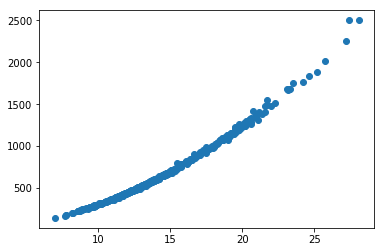

In [4]:
# Scatter plot of our label-less data
# since we are exploring this fresh/blind

plt.scatter(df['radius_mean'], df['area_mean'])
plt.show()

# exploratory - through elbow graph

To figure out the appropriate k.
Why? We need to select k random points (i.e. k-actual data points at random) to act as initial centroids

In [5]:
# empty list 
sum_of_squared_distances = []

K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    
    # remember: df refers to the original, unlabelled x,y df
    km = km.fit(df)
    
    sum_of_squared_distances.append(km.inertia_)

ValueError: ignored

In [0]:
plt.plot(K, sum_of_squared_distances, 'bx-')

plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')

plt.title('Elbow Method For Optimal k')

plt.show()

# find cluster of points around centroid, find new centroid for that cluster, repeat until model convergence

## we have our k, let's get first set of centroids

A centroid is an imaginary point located at the average location of all of the points in a given cluster. 

In [0]:
# I think this is just initializing the algorithm by choosing random points
# to serve as the initial fake centroid

# replace k 
centroids = points.sample(k???)
centroids.head()

The function below helps us get the nearest centroid

In [0]:
import math
import numpy as np
from scipy.spatial import distance

# Calculate the Nearest Centroid to each data point
def find_nearest_centroid(df, centroids, iteration):
 
  # calculate the distances between each point and each centroid
  distances = distance.cdist(df, centroids, 'euclidean')
  
  # Get nearest centroid to each point based on distance
  nearest_centroids = np.argmin(distances, axis=1)

  se = pd.Series(nearest_centroids)
  df['cluster_'+iteration] = se.values
  
  return df

In [0]:
first_pass = find_nearest_centroid(points.select_dtypes(exclude='int64'), centroids, '1')
first_pass.head()

## then, find the cluster of points surrounding the centroid

this plots the first round of centroids we found, so we can look at it visually to see if it fits

In [0]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()
  
# plot_clusters(first_pass, 'cluster_1', centroids)

## then, get new centroids

In [0]:
# function for new centroids: get_centroids

def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

# centroids = get_centroids(first_pass, 'cluster_1')

## plot to find the cluster around our second round of centroids...

In [0]:
# Get Clusters for New Centroids
second_pass = find_nearest_centroid(first_pass.select_dtypes(exclude='int64'), centroids, '2')

# Plot New Cluster
plot_clusters(second_pass, 'cluster_2', centroids)

## Basically, we keep doing this until we're done

We reach this step after our clusters stabilize and the centroids stop moving. 

In [0]:
convergence = np.array_equal(fifth_pass['cluster_5'], sixth_pass['cluster_6'])

print("Are we at convergence?? - ", convergence)

## final plot

AttributeError: ignored

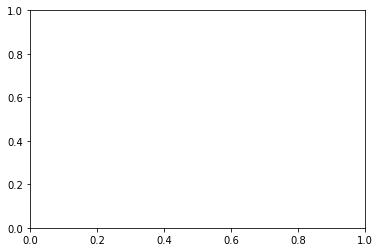

In [17]:
# plots the centroids in the on the data
centroids = get_centroids(df, 'clusters')

plot_clusters(df, 'clusters', centroids)

# Scikit learn

Initial centroids first

In [0]:
# I think this is just initializing the algorithm by choosing random points
# to serve as the initial fake centroid

# replace k 
centroids = points.sample(k???)
centroids.head()

find_nearest_centroid function and get_centroid

In [0]:
def find_nearest_centroid(df, centroids):
  last_centroids = [np.random.choice([0,1,2])] * df.shape[0]
  df_temp = df.copy()
  i = 0
  
  while True:
    if i>0:
      centroids = get_centroids(df_temp, 'cluster' + str(i-1))

    distances = distance.cdist(df_temp[['x', 'y']], centroids[['x', 'y']])
    nearest_centroids = np.argmin(distances, axis=1)
    
    df_temp['cluster' + str(i)] = nearest_centroids
    
    if (list(nearest_centroids) == list(last_centroids)):
      return df_temp
    else:
      i +=1
      last_centroids = nearest_centroids
      
def get_centroids(df, column_header):
  x = [df.x[df[column_header]==0].mean(), df.x[df[column_header]==1].mean(), df.x[df[column_header]==2].mean()]
  y = [df.y[df[column_header]==0].mean(), df.y[df[column_header]==1].mean(), df.y[df[column_header]==2].mean()]
  data = {'x': x, 'y' : y}
  return pd.DataFrame(data)
  
  
find_nearest_centroid(points, centroids).head()

## scikitlearn

find k first through an elbow graph

In [0]:
df = df[['radius_mean', 'texture_mean']]

In [0]:
df

In [0]:
# empty list 
sum_of_squared_distances = []

K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    
    # remember: df refers to the original, unlabelled x,y df
    km = km.fit(df)
    
    sum_of_squared_distances.append(km.inertia_)

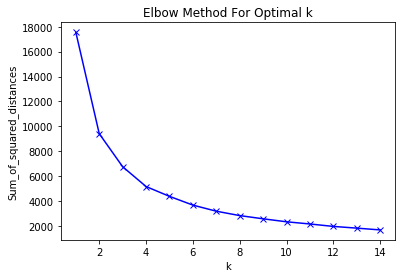

In [9]:
plt.plot(K, sum_of_squared_distances, 'bx-')

plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')

plt.title('Elbow Method For Optimal k')

plt.show()

In [10]:
from sklearn.cluster import KMeans 

# fill with k obtained in elbow graph
kmeans = KMeans(n_clusters=3)

# unsure what this does
kmeans.fit(df[['radius_mean', 'texture_mean']])

# this creates the labels
labels = kmeans.labels_

print(labels)

[0 2 2 1 2 0 2 1 1 1 1 0 2 1 1 1 1 2 2 0 0 0 0 2 2 0 1 2 1 0 2 0 2 2 0 2 1
 0 1 1 1 1 2 1 1 2 0 0 0 1 1 0 0 2 1 0 2 1 0 0 0 1 1 0 1 1 1 0 0 0 2 0 2 0
 0 2 0 2 2 0 1 0 2 2 0 2 1 2 1 0 1 1 0 0 0 2 0 0 0 0 1 0 1 0 0 0 0 0 2 1 0
 1 0 0 0 1 0 0 1 2 0 2 2 0 0 0 1 2 0 2 0 2 2 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 2 2 0 0 0 2 2 1 2 0 0 2 2 0 0 0 0 0 0 0 0 2 1 0 2 2 2 0 1
 0 2 0 0 0 1 1 0 1 1 0 1 2 2 1 0 2 2 1 0 0 0 2 1 0 2 0 2 2 1 0 0 0 2 1 0 0
 0 2 0 0 0 0 1 1 2 1 1 2 0 1 2 2 1 1 0 0 0 1 2 0 0 0 1 0 2 0 2 2 2 0 2 0 1
 1 2 2 2 2 2 2 0 1 0 1 0 0 2 0 2 0 0 2 0 0 2 0 2 2 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 2 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 2 0 0 0 0 2 2 0 0 0
 0 0 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 2 2 1 0 0 0 0 0 0 0 1 0 2 0 2 2 0 2 2
 1 0 2 2 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 2 0 0 2 2 0 0 0 0 0 0 2 0 0 0 0 0 0
 1 2 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 2 2 0 0 0 0 0 0 0 2 0 0
 2 1 1 0 0 2 1 2 1 0 0 1 1 1 1 1 1 2 1 0 0 1 1 0 2 0 0 1 0 1 0 0 1 0 0 2 0
 0 0 0 0 0 0 2 0 2 1 0 2 

In [0]:
labels

In [19]:
# Add our new labels to the dataframe
new_series = pd.Series(labels)

df['clusters'] = new_series.values

df.head()

,radius_mean,texture_mean,clusters
0,17.99,10.38,0
1,20.57,17.77,2
2,19.69,21.25,2
3,11.42,20.38,1
4,20.29,14.34,2


AttributeError: ignored

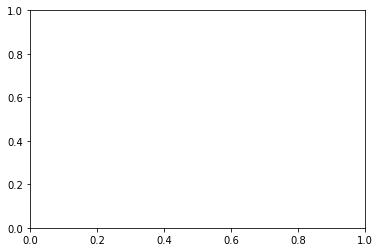

In [18]:
# We might get unlucky with different centroids and have slightly different clusters.
centroids = get_centroids(df, 'clusters')

plot_clusters(df, 'clusters', centroids)

# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You might want to standardize your data before PCA (If you decide to use PCA). 

## Manage your time and don't spend it all on data exploration or something like that. You got this!

# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to check how accurate your clustering was. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.